* To check the surface currents within Fraser River channel and compare that with old river.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
import scipy.io as sio
import os
import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from salishsea_tools import nc_tools, viz_tools, tidetools, stormtools, bathy_tools
import seaborn as sns
from __future__ import division
sns.set_style('darkgrid')

In [2]:
sites = {'Sandheads': {
        'lat': 49.10,
        'lon': -123.30,
        'i' : 426,
        'j' : 293
     },'Deas Island':{
        'lat' : 48.12,
        'lon' : -123.07,
        'i' : 414,
        'j' : 328
    }, 'New Westminster': {
        'lat': 49.21,
        'lon': -122.89,
        'i': 418,
        'j': 365
        },'Mission': {
        'lat': 48.59,
        'lon': -123.2,
        'i':  500,
        'j':367
    }, }

In [3]:
grid6 =nc.Dataset(
        '/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc',
        'r')
grid2 =nc.Dataset(
        '/ocean/jieliu/research/meopar/nemo-forcing/grid/bathy_meter_SalishSea2.nc',
        'r')
grids = [grid2,grid6]
Bathy = grid6.variables['Bathymetry'][:, :]
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]

In [4]:
runs=['oct8_10nowcast','oct8_10RFdailySmoo']
stds = ['SalishSea_1h_20141004_20141010','SalishSea_1h_20141008_20141010']
base='/data/jieliu/MEOPAR/river-treatment/'

depths={};sals={}; Us={}; Vs={}
for run,std in zip(runs,stds):
    path = os.path.join(base,'{}/'.format(run),'{}'.format(std)+'_grid_T.nc')
    f = nc.Dataset(path,'r');
    sals[run]=f.variables['vosaline']
    depths[run] = f.variables['deptht'] 
    T_lat = f.variables['nav_lat']
    T_lon = f.variables['nav_lon']
    timesteps = f.variables['time_counter']
    #Loading data on the ugrid
    path = os.path.join(base,'{}/'.format(run),'{}'.format(std)+'_grid_U.nc')
    f = nc.Dataset(path,'r');
    Us[run]=f.variables['vozocrtx']
    #Loading data on the ugrid
    path = os.path.join(base,'{}/'.format(run),'{}'.format(std)+'_grid_V.nc')
    f = nc.Dataset(path,'r');
    Vs[run]=f.variables['vomecrty']
## for time t
path = os.path.join(base,'{}/'.format(runs[1]),'{}'.format(stds[1])+'_grid_T.nc')
f = nc.Dataset(path,'r');
t_t = nc_tools.timestamp(f, np.arange(len(timesteps)))
for ind in range(len(t_t)):
    t_t[ind] = t_t[ind].datetime
tt = np.array(t_t)   

In [5]:
def compare_surfacecurrent_at_stns(dep,run):
    '''This function was made to compare surface currents at different 
        Fraser River stations during a time period'''
    ##some constant parameters
    fig, axs = plt.subplots(2, 1, figsize=(15, 8))
    names = ['Sandheads', 'Deas Island', 'New Westminster', 'Mission']
    colors = ['g','DodgerBlue','tomato','Olive']
    ax = axs[0]
    for name,c in zip(names,colors):
        if run ==runs[0]:
            ax.plot(tt, Us[run][96:,dep,sites[name]['i'], sites[name]['j']], color = c,linewidth = 2, label = name)
        else:
            ax.plot(tt, Us[run][:,dep,sites[name]['i'], sites[name]['j']], color = c,linewidth = 2, label = name)
        ax.set_title(run,fontsize = 12)
        ax.set_ylabel('zonal surface current U (m/s)', fontsize = 12)

    ax = axs[1]
    for name, c in zip(names,colors):
        if run ==runs[0]:
            ax.plot(tt, Vs[run][96:,dep,sites[name]['i'], sites[name]['j']], color = c,linewidth = 2, label = name)
        else:
            ax.plot(tt, Vs[run][:,dep,sites[name]['i'], sites[name]['j']], color = c,linewidth = 2, label = name)
        ax.set_title(run,fontsize = 12)
        ax.set_ylabel('meridional surface current V (m/s)', fontsize = 12)
    for ax in axs:
        ax.set_ylim([-2,1])
        ax.set_xlim(tt[0],tt[-1])
        ax.set_xlabel('Time [utc]', fontsize = 12)
        plt.setp(ax.get_xticklabels(), fontsize=12)
        plt.setp(ax.get_yticklabels(), fontsize=12)
        legend = ax.legend(loc = 'best')
        legend.get_title().set_fontsize('12')
    return fig 

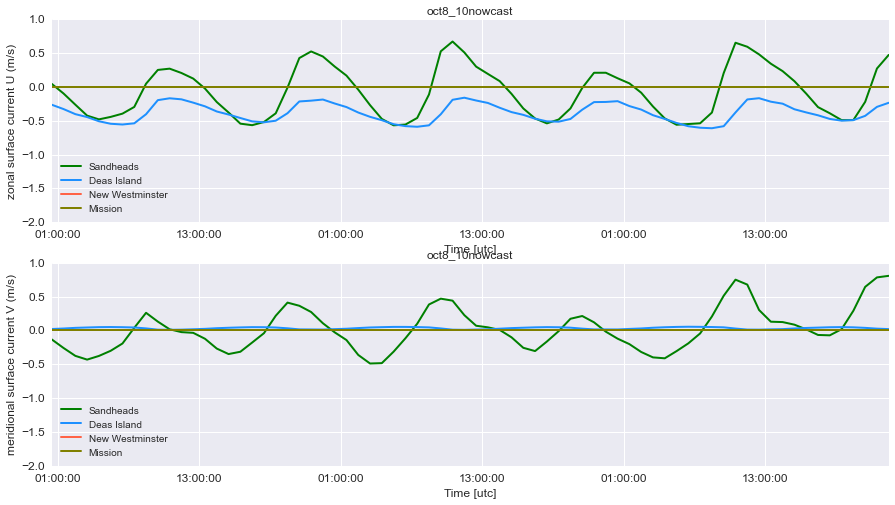

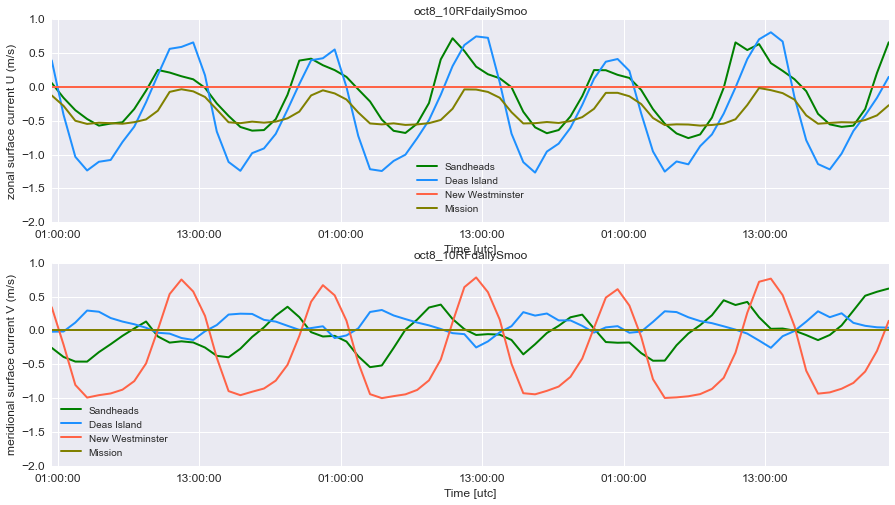

In [6]:
fig = compare_surfacecurrent_at_stns(0,runs[0])
fig = compare_surfacecurrent_at_stns(0,runs[1])

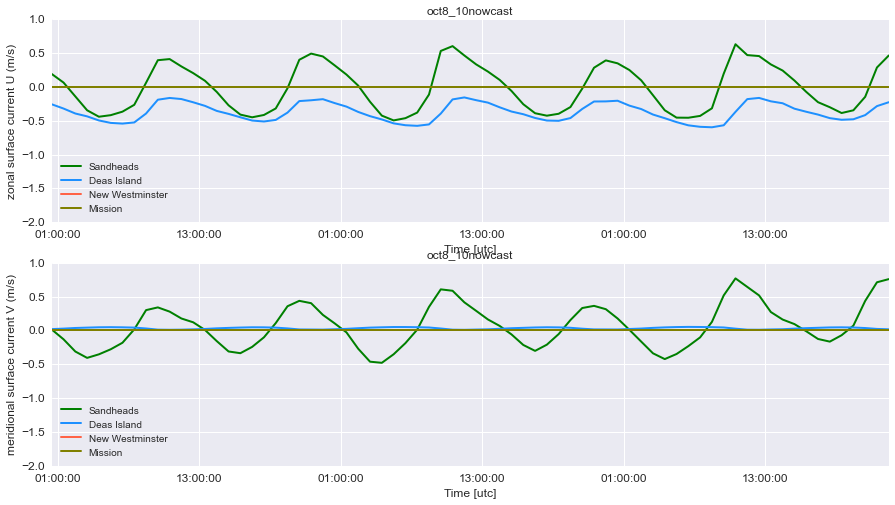

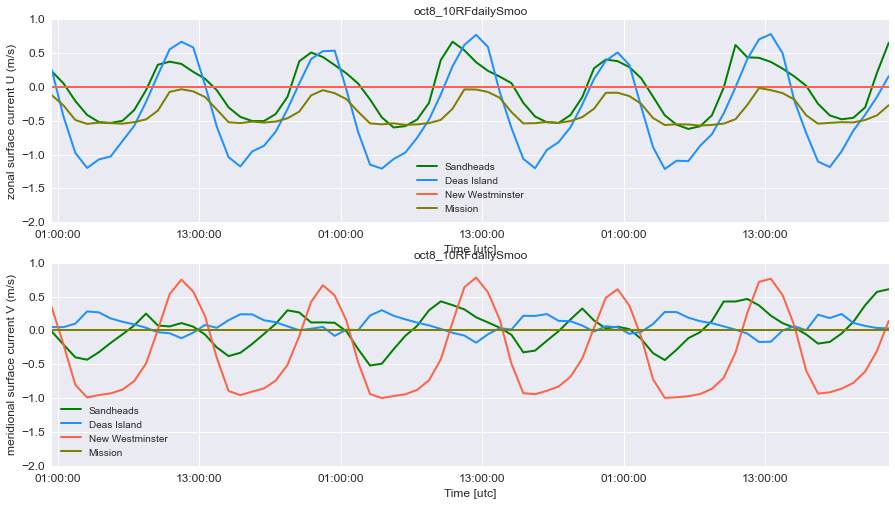

In [8]:
fig = compare_surfacecurrent_at_stns(1,runs[0])
fig = compare_surfacecurrent_at_stns(1,runs[1])

* This notebook was made to help understand why longer, deeper river creates stronger currents in the channel? Actually, due to mass conservation, the river flow at the mouth and inside the river should be decreaesd. However, from this set of plots, say, Deas Island, the surface currents are stronger and have tidal signal as well, so that longer river channel allows tides propagate and contribute tidal current component to the total surface current field.